## Computer Vision Assignment 
##### Assignment-IP1
Sneha Tiwari(SC22M092) MTech (First Year)

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from random import randint as randi
import math
import pywt

from __future__ import print_function
import time
import math

import numpy as np
from PIL import Image
from skimage import color, io
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


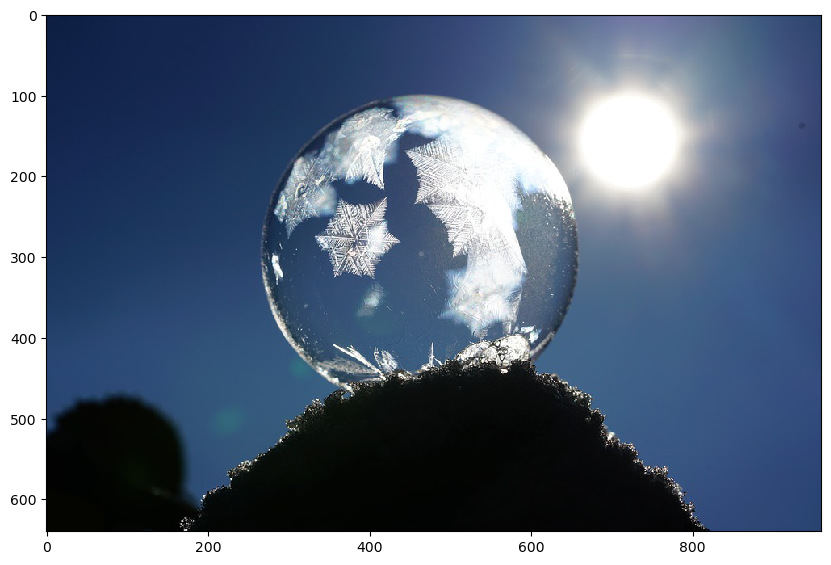

In [27]:
image1_path = 'image_1.jpg'
image2_path = 'image_2.png'
image3_path = 'image_3.png'
def display(img):
    plt.imshow(img)
    plt.show()
def load(image_path):
    out = None
    out  = io.imread(image_path,plugin='matplotlib')
    out = out.astype(np.float64) / 255
    return out

image1 = load(image1_path)

display(image1)

### a) Rotation


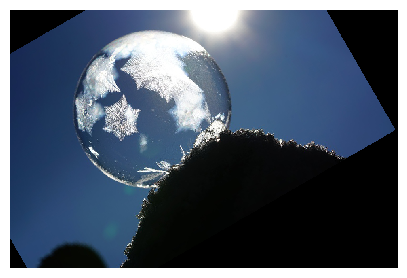

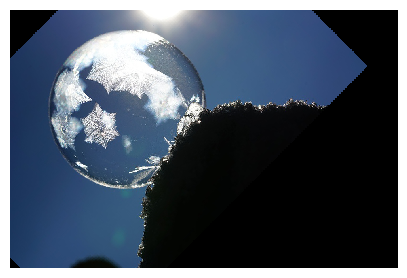

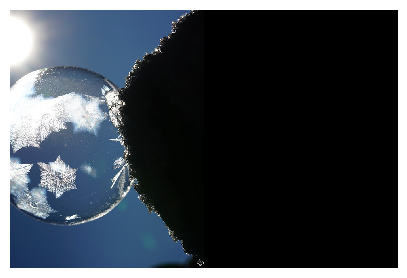

In [12]:
def rotate_image(input_image, theta):
    input_rows, input_cols, channels = input_image.shape
    output_image = np.zeros_like(input_image)

    height = output_image.shape[0]
    width  = output_image.shape[1]

    midx,midy = (width//2, height//2)

    for i in range(height):
        for j in range(width):
            x= (i-midx)*math.cos(theta)+(j-midy)*math.sin(theta)
            y= -(i-midx)*math.sin(theta)+(j-midy)*math.cos(theta)

            x=round(x)+midx 
            y=round(y)+midy 

            if (x>=0 and y>=0 and x<input_image.shape[0] and  y<input_image.shape[1]):
                output_image[i,j,:] = input_image[x,y,:]
    return output_image

display(rotate_image(image1,np.pi / 6.0))
display(rotate_image(image1,np.pi / 4.0))
display(rotate_image(image1,np.pi / 2.0))

### b) Scaling

#### Scaling using Pillow

In [115]:
from PIL import Image

# Load the original image
original_image = Image.open("image_1.jpg")

# Determine the dimensions of the scaled image
scaled_width = int(original_image.width * 0.5)
scaled_height = int(original_image.height * 0.5)

# Create a new image with the scaled dimensions
scaled_image = Image.new(original_image.mode, (scaled_width, scaled_height))

# Scale the image by copying pixels from the original image
for x in range(scaled_width):
    for y in range(scaled_height):
        original_x = int(x * 2)
        original_y = int(y * 2)
        pixel = original_image.getpixel((original_x, original_y))
        scaled_image.putpixel((x, y), pixel)

print(f"Scaling factor = {0.5} Dimesiom of Original Image: {original_image.size}, Dimension of Scaled Image: {scaled_image.size}")

Scaling factor = 0.5 Dimesiom of Original Image: (960, 640), Dimension of Scaled Image: (480, 320)


In [116]:
from PIL import Image

# Load the original image
original_image = Image.open("image_1.jpg")

# Determine the dimensions of the scaled image
scaled_width = int(original_image.width * 2)
scaled_height = int(original_image.height * 2)

# Create a new image with the scaled dimensions
scaled_image = Image.new(original_image.mode, (scaled_width, scaled_height))

# Scale the image by copying pixels from the original image
for x in range(scaled_width):
    for y in range(scaled_height):
        original_x = int(x / 2)
        original_y = int(y / 2)
        pixel = original_image.getpixel((original_x, original_y))
        scaled_image.putpixel((x, y), pixel)

print(f"Scaling factor = {2.0} Dimesiom of Original Image: {original_image.size}, Dimension of Scaled Image: {scaled_image.size}")

Scaling factor = 2.0 Dimesiom of Original Image: (960, 640), Dimension of Scaled Image: (1920, 1280)


#### Without Pillow

Scaling factor = 0.5 Dimesiom of Original Image: (960, 640), Dimension of Scaled Image: (320, 480, 3)


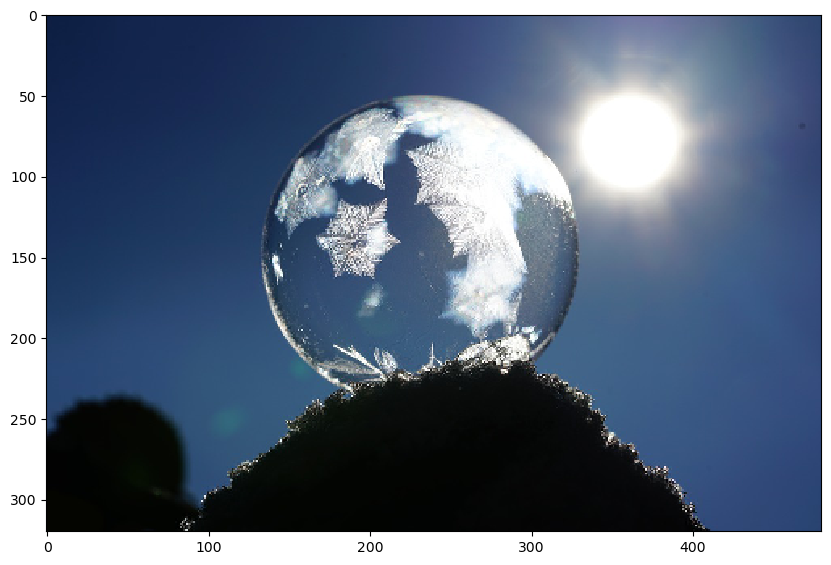

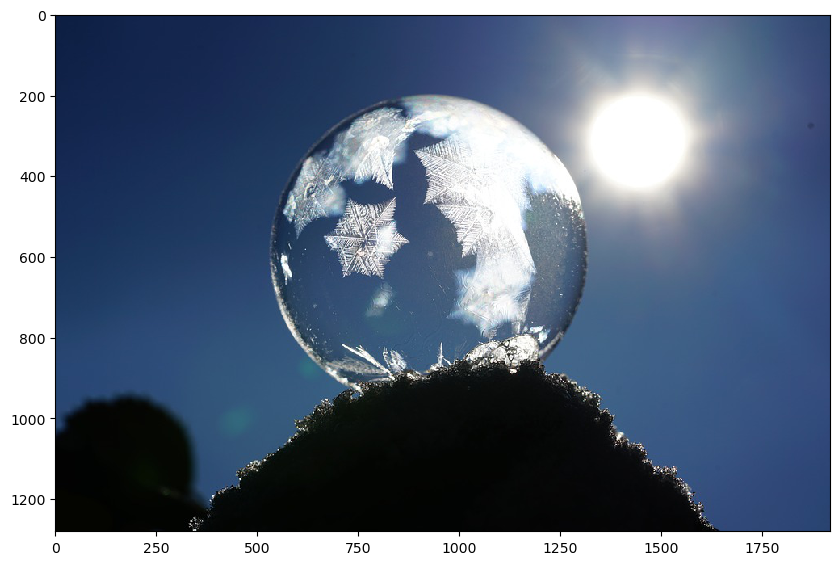

Scaling factor = 2 Dimesiom of Original Image: (960, 640), Dimension of Scaled Image: (1280, 1920, 3)


In [33]:
def resize_image(input_image, scale_factor):

    h,w = input_image.shape[:2]
    output_rows = int(h* scale_factor)
    output_cols = int(w* scale_factor)
    output_image = np.zeros(shape=(output_rows, output_cols, 3))
  
    # Iterate over each pixel position in the output image
    for i in range(output_rows):
        for j in range(output_cols):
            # Compute the corresponding input pixel position
#             input_i = int(i / scale_factor)
#             input_j = int(j / scale_factor)
            # Assign the input pixel value to the output pixel
            output_image[i, j, :] = input_image[int(i/scale_factor), int(j/scale_factor), :]

    return output_image
scaling_factor = 0.5
dim1 = resize_image(image1,scaling_factor)
print(f"Scaling factor = {scaling_factor} Dimesiom of Original Image: {original_image.size}, Dimension of Scaled Image: {dim1.shape}")
display(dim1)
scaling_factor = 2
dim2 = resize_image(image1,scaling_factor)
display(dim2)
print(f"Scaling factor = {scaling_factor} Dimesiom of Original Image: {original_image.size}, Dimension of Scaled Image: {dim2.shape}")

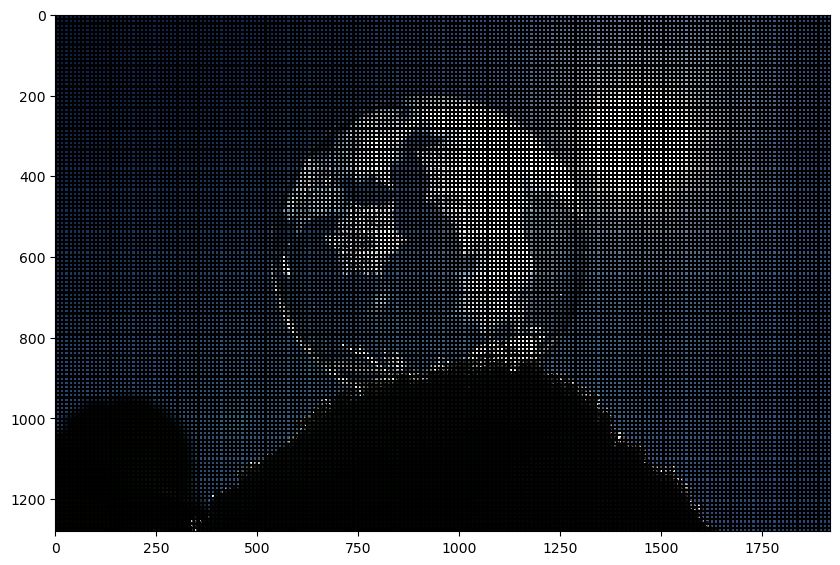

In [38]:
def resize_image(input_image, scale_factor):

    h,w = input_image.shape[:2]
    output_rows = int(h* scale_factor)
    output_cols = int(w* scale_factor)
    output_image = np.zeros(shape=(output_rows, output_cols, 3))
  
    # Iterate over each pixel position in the output image
    for i in range(h):
        for j in range(w):

            # Assign the input pixel value to the output pixel
            output_image[i*scale_factor, j*scale_factor, :] = input_image[i, j, :]

    return output_image
scaling_factor = 2
dim1 = resize_image(image1,scaling_factor)
display(dim1)

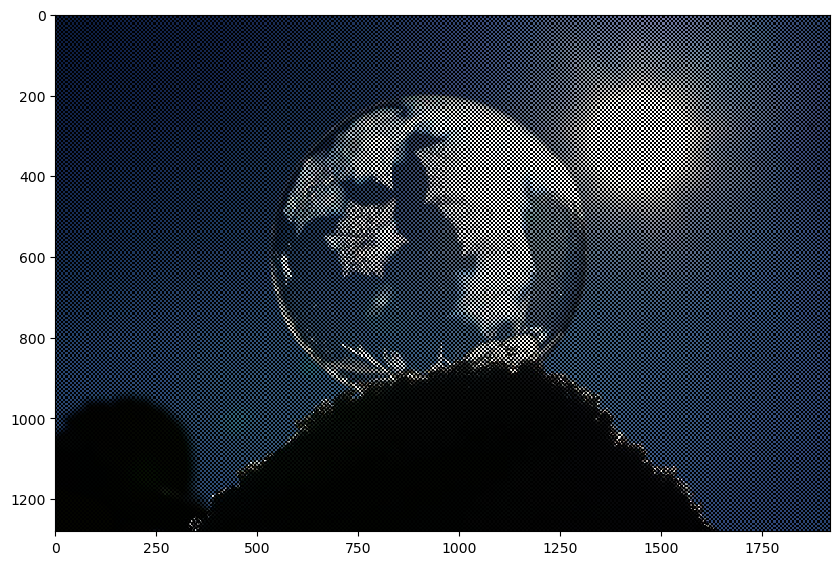

In [46]:
#filling
def resize_image(input_image, scale_factor):

    h,w = input_image.shape[:2]
    output_rows = int(h* scale_factor)
    output_cols = int(w* scale_factor)
    output_image = np.zeros(shape=(output_rows, output_cols, 3))
  
    # Iterate over each pixel position in the output image
    for i in range(h):
        for j in range(w):

            # Assign the input pixel value to the output pixel
            output_image[i*scale_factor, j*scale_factor, :] = input_image[i, j, :]
            output_image[i*scale_factor +1, j*scale_factor+1, :] = input_image[int((i+(i+1))/2), int((j+(j+1))/2), :]
            try:
                output_image[i*scale_factor +3, j*scale_factor+3, :] = input_image[i,j, :]
            except IndexError:
                pass
    return output_image
scaling_factor = 2
dim1 = resize_image(image1,scaling_factor)
display(dim1)

Question 2

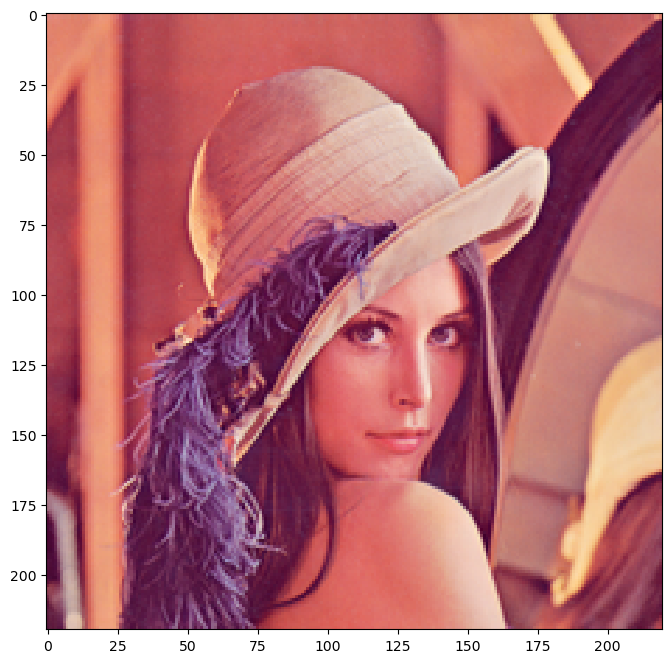

In [86]:
L = io.imread(image2_path,plugin='matplotlib')
display(L)

In [87]:
L

array([[[0.88235295, 0.5372549 , 0.49803922],
        [0.8784314 , 0.5372549 , 0.49803922],
        [0.8901961 , 0.5254902 , 0.46666667],
        ...,
        [0.8901961 , 0.5529412 , 0.5019608 ],
        [0.9098039 , 0.5882353 , 0.4862745 ],
        [0.8352941 , 0.47058824, 0.40784314]],

       [[0.88235295, 0.5372549 , 0.49803922],
        [0.8784314 , 0.53333336, 0.49803922],
        [0.8901961 , 0.5254902 , 0.46666667],
        ...,
        [0.9019608 , 0.5647059 , 0.50980395],
        [0.93333334, 0.60784316, 0.49411765],
        [0.85882354, 0.4862745 , 0.4117647 ]],

       [[0.8901961 , 0.5372549 , 0.47843137],
        [0.8784314 , 0.5254902 , 0.4627451 ],
        [0.89411765, 0.52156866, 0.45882353],
        ...,
        [0.81960785, 0.44313726, 0.41568628],
        [0.7411765 , 0.38039216, 0.3764706 ],
        [0.58431375, 0.23921569, 0.3137255 ]],

       ...,

       [[0.3529412 , 0.10980392, 0.23529412],
        [0.37254903, 0.11372549, 0.23921569],
        [0.38039216, 0

#### a)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


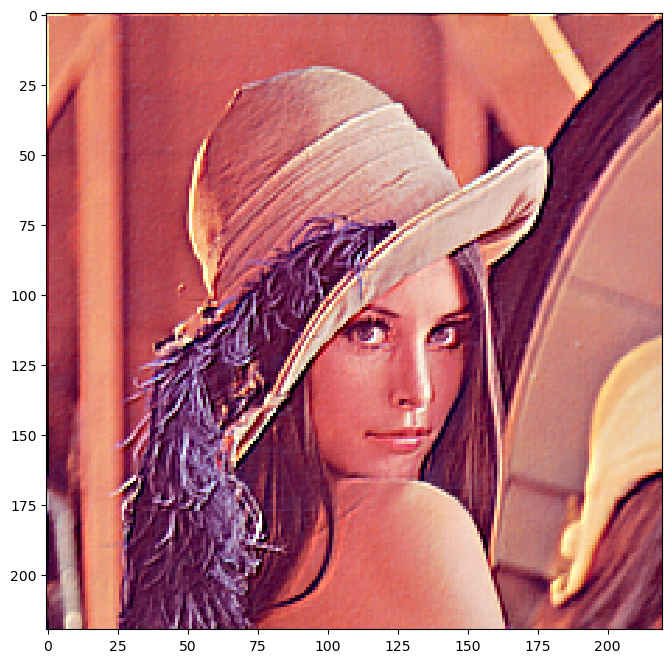

In [72]:
# unsharp masking
h,w = L.shape[:2]
L_new = np.zeros(shape=(h,w,3))
for i in range(h):
    for j in range(w):
        L_new[i,j,:] = L[i,j,:] + (L[i,j,:] - L[i-1,j-1,:]) 
display(L_new)  

'''
The purpose of unsharp masking is to enhance the details in an image by 
creating a new image that highlights the differences between the original 
image and a blurred version of the same image.
'''

#### b)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


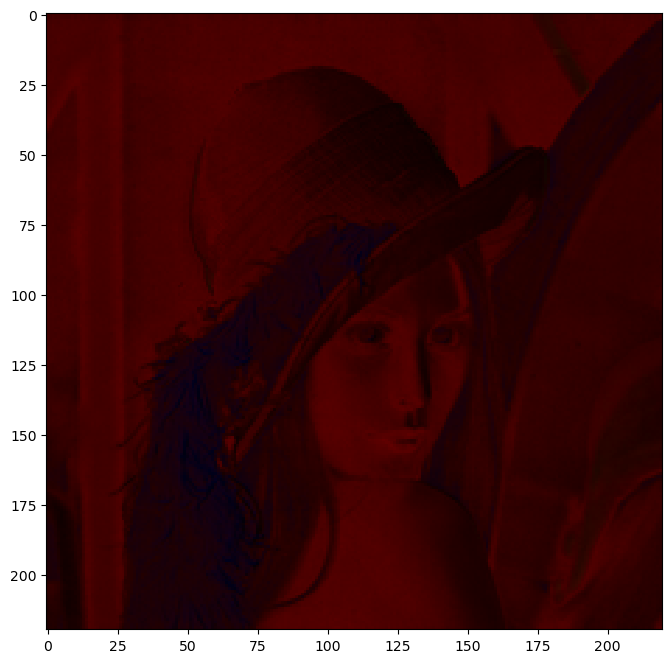

In [76]:
'''
L_new[i,j,:] = L[i,j,:] - ((L[i,j,0] + L[i,j,1] + L[i,j,2])/3) subtracts the 
luminance value from each color channel of the current pixel and stores the result in the 
corresponding pixel in the new image. This creates a grayscale version of the input image that 
retains the luminance information.
'''
h,w = L.shape[:2]
L_new = np.zeros(shape=(h,w,3))
for i in range(h):
    for j in range(w):
        L_new[i,j,:] = L[i,j,:] - ((L[i,j,0] + L[i,j,1] + L[i,j,2])/3)
display(L_new)  

#### c)

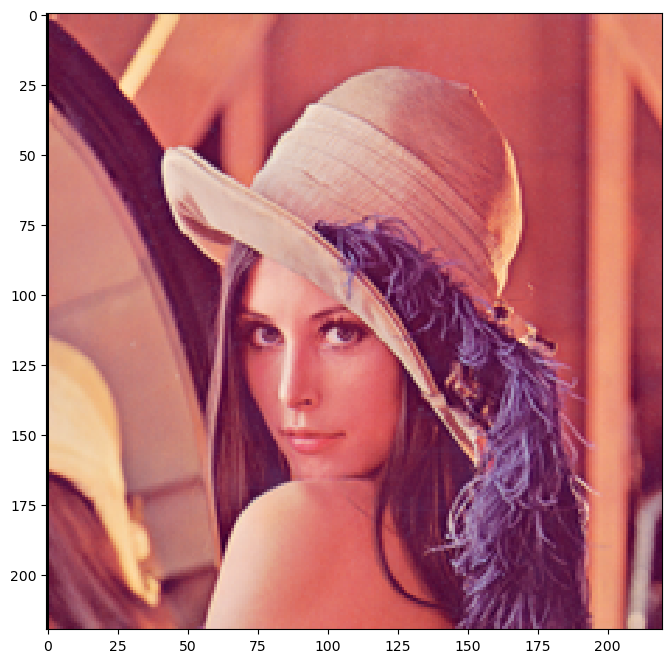

In [81]:
#image mirroring
h,w = L.shape[:2]
L_new = np.zeros(shape=(h,w,3))

for i in range(h):
    for j in range(w):
        try:
            L_new[i,j,:] = L[i,w-j,:]
        except IndexError:
            pass
display(L_new)

#### d)

If there are no headers or extra information to be stored and only pixel information needs to be stored, the size of the image in bytes would depend on the resolution of the image and the color depth.

For example, let's consider an image with a resolution of 800 x 600 pixels and a color depth of 24 bits per pixel. Each pixel would require 3 bytes of storage (1 byte for each color channel). Therefore, the total number of bytes required to store the image would be:

800 x 600 x 3 = 1,440,000 bytes

This calculation assumes that the image is stored in a raw format where the pixel values are stored consecutively in memory without any padding or compression. In reality, image file formats may use compression or other techniques to reduce the size of the image file while preserving the image quality

#### e)

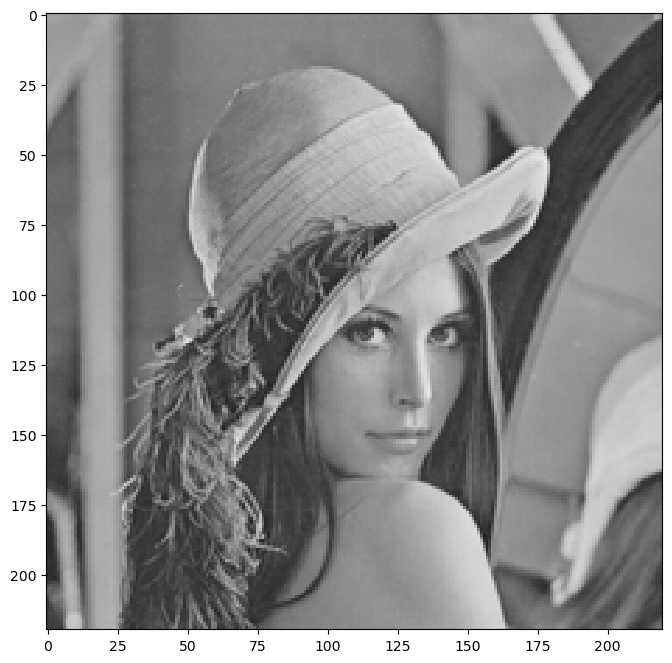

In [117]:
#grayscale 
h,w = L.shape[:2]
L_new_g = np.zeros(shape=(h,w,3))
for i in range(h):
    for j in range(w):
        L_new_g[i,j,:] = ((L[i,j,0] + L[i,j,1] + L[i,j,2])/3)
display(L_new_g)

#### f)

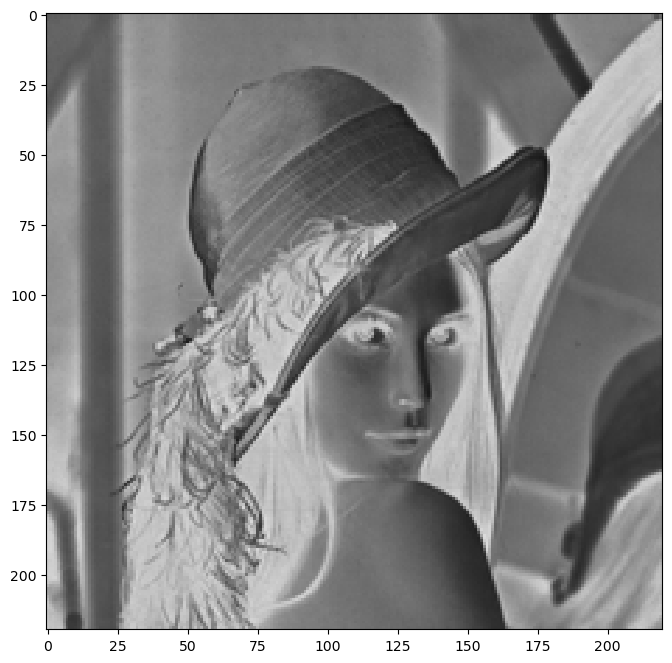

In [118]:
# complement the grayscale image
h,w = L.shape[:2]
L_new = np.zeros(shape=(h,w,3))
# for i in range(h):
#     for j in range(w):
#         L_new[i,j,:] = 2((L[255,j,0] + L[i,j,1] + L[i,j,2])/3)
L_new = 1 - L_new_g
display(L_new)

#### g)

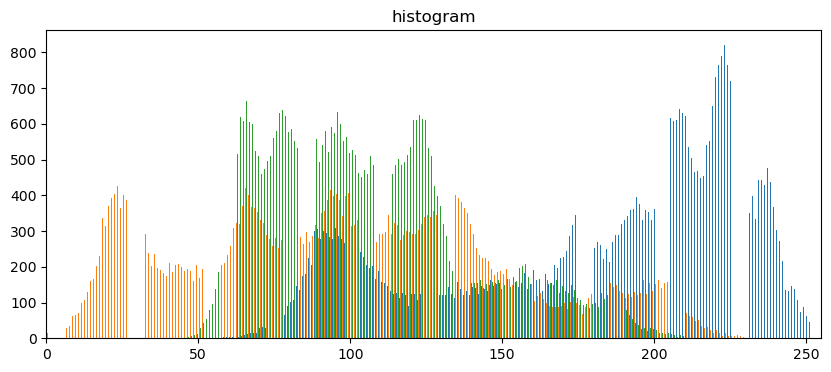

In [148]:
from PIL import Image
im=Image.open("image_2.png")
a = np.array(im.getdata())

fig, ax = plt.subplots(figsize=(10,4))
n,bins,patches = ax.hist(a, bins=range(256), edgecolor='none')
ax.set_title("histogram")
ax.set_xlim(0,255)


cm = plt.cm.get_cmap('cool')
# norm = plt.colors.Normalize(vmin=bins.min(), vmax=bins.max())
# for b,p in zip(bins,patches):
#     p.set_facecolor(cm(norm(b)))
plt.show()

Bin Width 0.01581699311733248


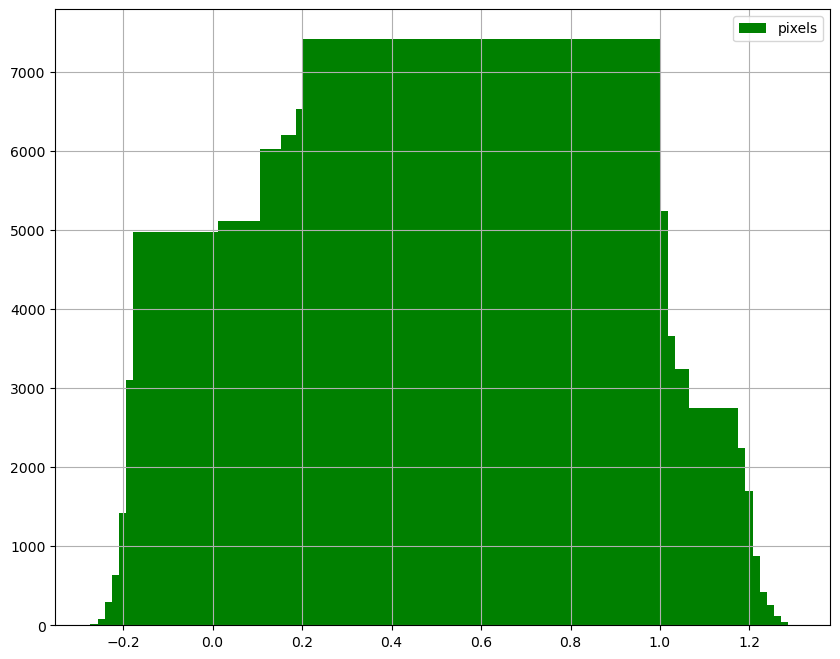

In [149]:
hist, bin_edges = np.histogram(L_new_g, bins=50)
        
bin_width = bin_edges[2] - bin_edges[1]
print("Bin Width",bin_width)
plt.figure()
plt.xlabel("")
plt.ylabel("")
plt.bar(bin_edges[:-1],hist,color = "green",label = 'pixels')
plt.grid()
plt.legend()
plt.title("")
plt.show()

#### h)

0.5028552205295699


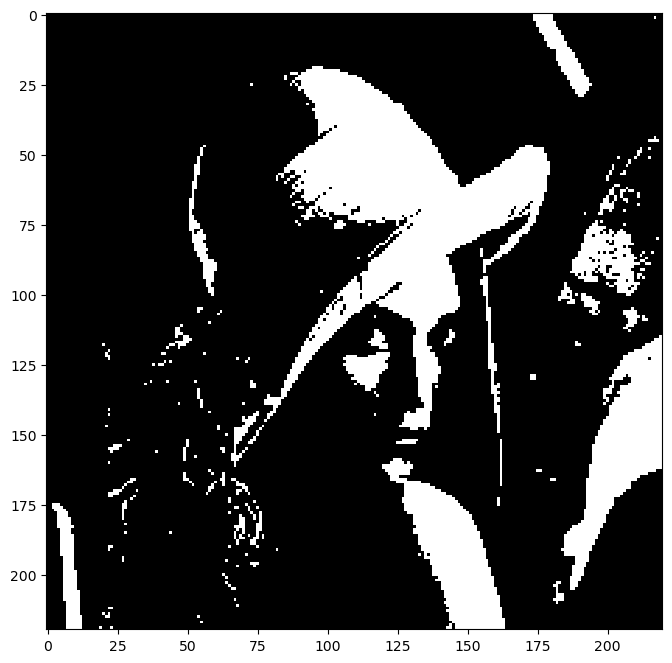

In [114]:
#binarize
h,w = L.shape[:2]
L_new = np.zeros(shape=(h,w,3))
threshold = []
for i in range(h):
    for j in range(w):
        # setting up the threshold to binarize
        t = ((L[i,j,:]+L[i,j,:]+L[i,j,:])/3)
        threshold.append(sum(t)/3)
# print(len(threshold))
thres = sum(threshold)/len(threshold)
print(thres)
for i in range(h):
    for j in range(w):
        # setting up the threshold to binarize
        if L[i,j,1] > thres and L[i,j,0] > thres and L[i,j,2] > thres:
            L_new[i,j,:] = [1.0,1.0,1.0]
        else:
            L_new[i,j,:] = [0.0,0.0,0.0]
display(L_new)